
-- 日経平均 -- <DataFrame>
                    Open          High           Low         Close  Volume  \
Date                                                                         
2000-01-04  18937.449219  19187.609375  18937.449219  19002.859375       0   
2000-01-05  19003.509766  19003.509766  18221.820312  18542.550781       0   
2000-01-06  18574.009766  18582.740234  18168.269531  18168.269531       0   
2000-01-07  18194.050781  18285.730469  18068.099609  18193.410156       0   
2000-01-11  18246.099609  18887.560547  18246.099609  18850.919922       0   

               Adj Close  
Date                      
2000-01-04  19002.859375  
2000-01-05  18542.550781  
2000-01-06  18168.269531  
2000-01-07  18193.410156  
2000-01-11  18850.919922  

-- ドル円為替レート -- <DataFrame>
            DEXJPUS
DATE               
2000-01-03   101.70
2000-01-04   103.09
2000-01-05   103.77
2000-01-06   105.19
2000-01-07   105.17

-- aapl = pdr.DataReader("AAPL", "yahoo") -- <Series>
                 

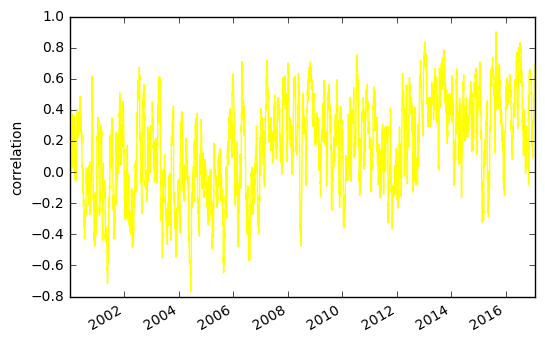

In [1]:
# tickdataをscrapingして、描画してみる。相関計算してみる。
#  Pandas : データベースライブラリ
import pandas_datareader.data as pdr
import pandas as pd
start = "2000/1/1"
end = "2017/1/31"

#  米国ヤフーファイナンスから、日経平均株価のデータ取得
n225 = pdr.DataReader("^N225", 'yahoo', start, end)
print ("\n-- 日経平均 -- <DataFrame>")
print (n225.head())

# ドル円の為替レートを取得 「DEXJPUS」はfredのドル円のレートの指定コード
# https://fred.stlouisfed.org/series/DEXJPUS
fx = pdr.DataReader('DEXJPUS', "fred", start, end)
print ("\n-- ドル円為替レート -- <DataFrame>")
print (fx.head())

# Yahoo financeアップルのtickdataを取得
# http://www.marketwatch.com/tools/quotes/lookup.asp?siteID=mktw&Lookup=apple&Country=all&Type=All
# ★ 開始日、終了日を指定しないと直近のデータをダウンロードする。？？？
print ("\n-- aapl = pdr.DataReader(\"AAPL\", \"yahoo\") -- <Series>")
aapl = pdr.DataReader("AAPL", "yahoo")
print(aapl.head(5))
print(aapl.tail(5))

# Yahoo financeアップルのtickdataを取得 配当と分割
print ("\n-- aapl = pdr.DataReader(\"AAPL\", \"yahoo-actions\", '2014/6/9', '2014/8/7') -- <Series>")
aapl = pdr.DataReader("AAPL", "yahoo-actions", '2014/6/9', '2014/8/7')
print(aapl.head(5))
print(aapl.tail(5))

# PEレシオ（株価収益率）、株価の変化率、株価、空売り比率
print ("\n-- aapl = pdr.get_quote_yahoo('AAPL') -- <Series>")
aapl = pdr.get_quote_yahoo('AAPL')
print(aapl)

#  日経平均の終値と、ドル円の為替レートの表を作る。
#  dropna() : どちらかに空のレコードが有ればその業は削除
port = pd.concat([n225.Close, fx], axis=1).dropna()
print ("\n-- 日経平均の終値と、ドル円の為替レートの表 -- <DataFrame>")
print (port.head())

#  日経平均の終値価格を変化率に変換
n = port.Close.pct_change().dropna()
print ("\n-- Close.pct_change -- <Series>")
print (n.head())

#  為替レートの価格を変化率に変換
f = port.DEXJPUS.pct_change().dropna()
print ("\n-- DEXJPUS.pct_change <Series>-- ")
print (f.head())

#  Matplotlib : 描画ライブラリ
%matplotlib inline
import matplotlib.pyplot as plt

#  20日の移動相関を計算し、グラフに表示。
f.rolling(window=20).corr(n).plot(color="yellow")
plt.ylabel('correlation')
